# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 7.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
409116,0.0391,0.0024,0.0024,0.0024,0.0024,0.1538,0.0854,0.0586,0.0024,0.1636,0,0,0,0
270445,0.0024,0.0024,0.0024,0.0024,0.0049,0.0415,0.2588,0.4688,0.0024,0.1929,0,0,0,0
96307,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.2466,0.0708,0.0146,0.4785,0,0,0,0
84868,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.1807,0.0171,0.0024,0.1538,0,0,0,0
232445,0.0024,0.6396,4.6582,0.4883,0.3296,1.4355,0.6787,0.9204,2.1533,0.2612,7,7,16,16


In [3]:
raw_data.shape

(465343, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465343 entries, 0 to 465342
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          465343 non-null  float64
 1   Emg2          465343 non-null  float64
 2   Emg3          465343 non-null  float64
 3   Emg4          465343 non-null  float64
 4   Emg5          465343 non-null  float64
 5   Emg6          465343 non-null  float64
 6   Emg7          465343 non-null  float64
 7   Emg8          465343 non-null  float64
 8   Emg9          465343 non-null  float64
 9   Emg10         465343 non-null  float64
 10  repetition    465343 non-null  int64  
 11  rerepetition  465343 non-null  int64  
 12  stimulus      465343 non-null  int64  
 13  restimulus    465343 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.7 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000
mean,0.016418,0.174769,0.072729,0.029455,0.045257,0.323000,0.492774,0.348617,0.112679,0.320979,3.170298,2.318877,5.616943,4.164977
std,0.077547,0.405425,0.272274,0.071421,0.087363,0.445777,0.521808,0.422231,0.280829,0.225615,3.484652,3.300599,6.579710,6.287999
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.063500,0.185500,0.105000,0.002400,0.183100,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.002400,0.002400,0.002400,0.012200,0.188000,0.346700,0.212400,0.004900,0.244100,2.000000,0.000000,3.000000,0.000000
75%,0.007300,0.163600,0.012200,0.019500,0.051300,0.388200,0.603000,0.429700,0.075700,0.412600,6.000000,5.000000,10.000000,8.000000
max,2.321800,4.665500,4.660600,1.892100,2.136200,4.665500,4.663100,4.665500,4.660600,3.398400,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     197148
4      15514
8      15513
2      15507
12     15503
7      15490
6      15486
9      15483
5      15470
11     15462
3      15455
1      15433
10     15427
13     10339
17     10337
14     10336
15     10304
16     10259
21      5166
18      5165
19      5160
20      5130
23      5130
22      5126
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

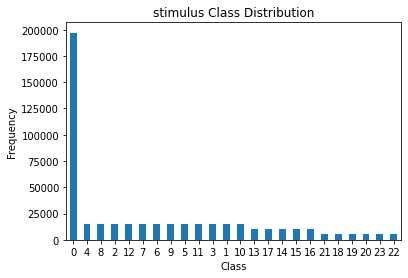

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
158281,0.0024,0.0024,0.0024,0.0024,0.0073,0.0928,0.1904,0.1270,0.0024,0.3247,0,0,0,0
397810,0.0049,0.0024,0.0024,0.0024,0.0317,0.1123,0.0781,0.1807,0.0024,0.1709,0,0,0,0
390115,0.0024,0.0024,0.0024,0.0024,0.0024,0.0488,0.0586,0.1416,0.0464,0.2368,0,0,0,0
308569,0.0024,0.3906,0.0122,0.1074,0.1611,0.9839,1.7920,0.2783,0.0464,0.2759,1,1,8,8
15152,0.0024,0.0024,0.0024,0.0024,0.0024,0.0244,0.1538,0.1172,0.0024,0.1538,0,0,0,0


In [12]:
raw_data.shape

(387008, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387008 entries, 0 to 465342
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          387008 non-null  float64
 1   Emg2          387008 non-null  float64
 2   Emg3          387008 non-null  float64
 3   Emg4          387008 non-null  float64
 4   Emg5          387008 non-null  float64
 5   Emg6          387008 non-null  float64
 6   Emg7          387008 non-null  float64
 7   Emg8          387008 non-null  float64
 8   Emg9          387008 non-null  float64
 9   Emg10         387008 non-null  float64
 10  repetition    387008 non-null  int64  
 11  rerepetition  387008 non-null  int64  
 12  stimulus      387008 non-null  int64  
 13  restimulus    387008 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 89.25221570502055


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     39037
           1       0.81      0.83      0.82      2203
           2       0.77      0.76      0.77      2428
           3       0.81      0.81      0.81      2206
           4       0.83      0.83      0.83      2160
           5       0.87      0.88      0.87      1972
           6       0.87      0.85      0.86      2193
           7       0.86      0.85      0.86      2070
           8       0.82      0.80      0.81      2293
           9       0.80      0.84      0.82      1921
          10       0.74      0.74      0.74      2093
          11       0.83      0.84      0.84      2006
          12       0.82      0.81      0.81      2165
          13       0.86      0.86      0.86      1405
          14       0.85      0.85      0.85      1393
          15       0.78      0.80      0.79      1663
          16       0.88      0.86      0.87      1693
 

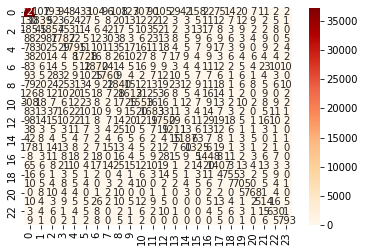

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.7775122089868479
MSE: 8.359021730704633
RMSE: 2.8911972832556123


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8925557970487341
Recall Score :  0.8925221570502054
f1_score :  0.8925035262054827


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 95.40580346761067


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     39037
           1       0.94      0.94      0.94      2203
           2       0.91      0.89      0.90      2428
           3       0.94      0.91      0.93      2206
           4       0.96      0.94      0.95      2160
           5       0.97      0.96      0.96      1972
           6       0.96      0.95      0.95      2193
           7       0.95      0.94      0.94      2070
           8       0.94      0.95      0.94      2293
           9       0.93      0.93      0.93      1921
          10       0.84      0.84      0.84      2093
          11       0.94      0.95      0.95      2006
          12       0.95      0.93      0.94      2165
          13       0.98      0.97      0.97      1405
          14       0.95      0.95      0.95      1393
          15       0.88      0.87      0.88      1663
          16       0.98      0.96      0.97      1693
 

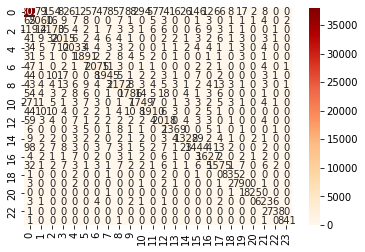

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.348996149970285
MSE: 3.7714916927211184
RMSE: 1.9420328763234465


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9539659252308264
Recall Score :  0.9540580346761066
f1_score :  0.9539684067043294


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 95.73137645022094


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     39037
           1       0.96      0.93      0.94      2203
           2       0.94      0.88      0.91      2428
           3       0.96      0.91      0.93      2206
           4       0.98      0.91      0.95      2160
           5       0.98      0.95      0.97      1972
           6       0.98      0.94      0.96      2193
           7       0.96      0.92      0.94      2070
           8       0.97      0.94      0.95      2293
           9       0.94      0.91      0.92      1921
          10       0.92      0.81      0.86      2093
          11       0.96      0.93      0.95      2006
          12       0.97      0.92      0.94      2165
          13       0.99      0.95      0.97      1405
          14       0.96      0.95      0.96      1393
          15       0.96      0.85      0.90      1663
          16       0.99      0.96      0.97      1693
 

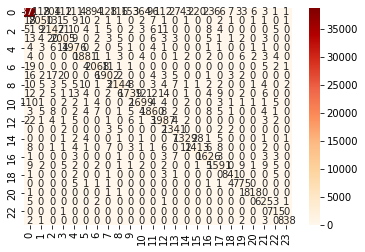

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.3286995168083512
MSE: 3.577091031239503
RMSE: 1.8913199177398579


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9575720138458454
Recall Score :  0.9573137645022093
f1_score :  0.9568407154129781


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[16:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 95.42647476809385


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     39037
           1       0.94      0.93      0.94      2203
           2       0.90      0.88      0.89      2428
           3       0.94      0.90      0.92      2206
           4       0.96      0.93      0.94      2160
           5       0.97      0.96      0.96      1972
           6       0.96      0.94      0.95      2193
           7       0.95      0.92      0.93      2070
           8       0.95      0.93      0.94      2293
           9       0.94      0.92      0.93      1921
          10       0.89      0.83      0.86      2093
          11       0.94      0.92      0.93      2006
          12       0.95      0.91      0.93      2165
          13       0.96      0.95      0.95      1405
          14       0.96      0.96      0.96      1393
          15       0.93      0.88      0.90      1663
          16       0.97      0.95      0.96      1693
 

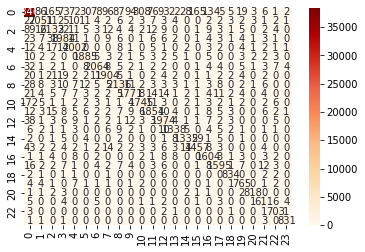

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.34388000310069505
MSE: 3.717694633213612
RMSE: 1.9281324210783894


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9539969137804529
Recall Score :  0.9542647476809385
f1_score :  0.9539394538908844


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 96.05694943283119


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     39037
           1       0.97      0.94      0.95      2203
           2       0.95      0.89      0.92      2428
           3       0.98      0.91      0.94      2206
           4       0.98      0.93      0.95      2160
           5       0.99      0.96      0.97      1972
           6       0.98      0.95      0.96      2193
           7       0.97      0.93      0.95      2070
           8       0.98      0.94      0.96      2293
           9       0.97      0.91      0.94      1921
          10       0.93      0.81      0.87      2093
          11       0.97      0.93      0.95      2006
          12       0.98      0.92      0.95      2165
          13       0.99      0.97      0.98      1405
          14       0.98      0.95      0.97      1393
          15       0.96      0.85      0.90      1663
          16       0.99      0.97      0.98      1693
 

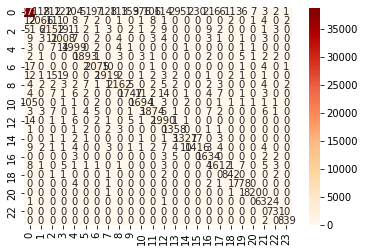

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.31452675641456296
MSE: 3.4743417482752386
RMSE: 1.8639586230051457


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9610781435647631
Recall Score :  0.960569494328312
f1_score :  0.9601311426962574
